Processing images in folder: data\1
Processing images in folder: data\2
Processing images in folder: data\3
Processing images in folder: data\4
Processing images in folder: data\5
Processing images in folder: data\6
Processing images in folder: data\7
Processing images in folder: data\8
Processing images in folder: data\9


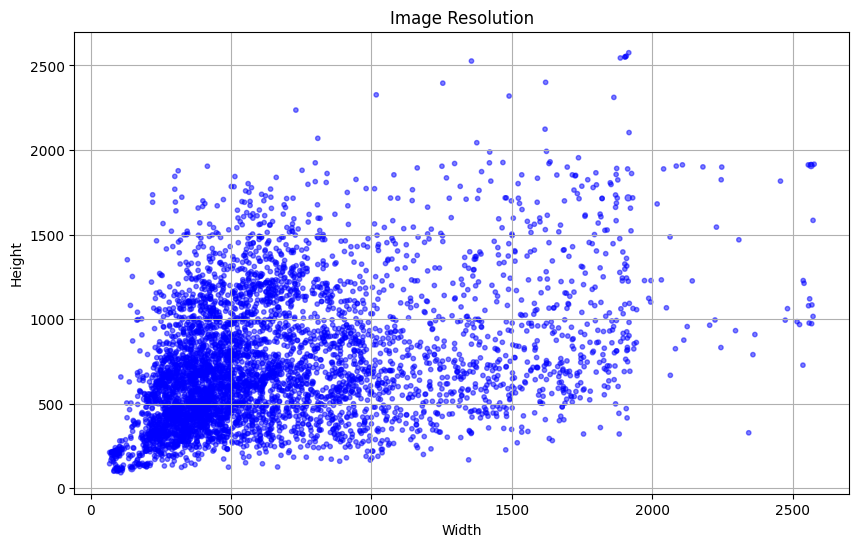

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

def process_images_in_folder(folder_path):
    print("Processing images in folder:", folder_path)
    dimensions = []
    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".jpeg", ".png", ".gif")):
            image_path = os.path.join(folder_path, filename)
            width, height = get_image_size(image_path)
            dimensions.append((width, height))
    return dimensions

data_dir = "data"  # Replace this with the path to your "data" directory

# Initialize list to store dimensions
all_dimensions = []

# Traverse the "data" directory
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        dimensions = process_images_in_folder(folder_path)
        all_dimensions.extend(dimensions)

# Counting frequency of each dimension
dimension_counts = Counter(all_dimensions)

# Extracting widths, heights, and their corresponding frequencies for plotting
widths, heights = zip(*dimension_counts.keys())
sizes = [count * 10 for count in dimension_counts.values()]  # Adjust size multiplier as needed

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, s=sizes, alpha=0.5, color='blue')  # Adjust size multiplier as needed
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Resolution')
plt.grid(True)
plt.show()


In [1]:
import os
import shutil
import random

# Set the seed for reproducibility
random.seed(42)

# Define your directories
root_dir = 'data_withoutanomalies'  # Adjust this to your dataset directory
train_dir = 'train_data'  # Directory for training data
val_dir = 'val_data'  # Directory for validation data

# Create training and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get all label directories
labels = os.listdir(root_dir)

for label in labels:
    label_dir = os.path.join(root_dir, label)
    files = os.listdir(label_dir)

    # Shuffle files and calculate split
    random.shuffle(files)
    split_point = int(0.1 * len(files))

    # Files for validation
    val_files = files[:split_point]
    # Files for training
    train_files = files[split_point:]

    # Create corresponding label directories in train and val directories
    train_label_dir = os.path.join(train_dir, label)
    val_label_dir = os.path.join(val_dir, label)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(val_label_dir, exist_ok=True)

    # Copy files
    for file in val_files:
        shutil.copy(os.path.join(label_dir, file), os.path.join(val_label_dir, file))
    for file in train_files:
        shutil.copy(os.path.join(label_dir, file), os.path.join(train_label_dir, file))


In [4]:
# import os
# from PIL import Image
# import torchvision.transforms as transforms


# def random_transforms(image):
#     transform = transforms.Compose([
#         transforms.RandomHorizontalFlip(p=0.3), 
#     ])
#     return transform(image)

# def process_and_save_images(data_dir, processed_dir):
#     for label in os.listdir(data_dir):
#         class_dir = os.path.join(data_dir, label)
#         processed_class_dir = os.path.join(processed_dir, label)
#         os.makedirs(processed_class_dir, exist_ok=True)  # Create target directory if it doesn't exist
        
#         for image_filename in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_filename)
#             image = Image.open(image_path)
            
#             # Save original image
#             image.save(os.path.join(processed_class_dir, image_filename))
            
#             # Apply transformation and save the transformed image
#             transformed_image = random_transforms(image)
            
#             # Save transformed image directly
#             transformed_image.save(os.path.join(processed_class_dir, f"transformed_{image_filename}"))

# data_directory = 'train_data'
# processed_directory = 'train_dataaugmented'
# process_and_save_images(data_directory, processed_directory)


import os
import random
from PIL import Image
import torchvision.transforms as transforms

def random_transforms(image):
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1), 
        # Add more transformations as needed
    ])
    return transform(image)

def process_and_save_images(data_dir, processed_dir, target_count=1000):
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        processed_class_dir = os.path.join(processed_dir, label)
        os.makedirs(processed_class_dir, exist_ok=True)  # Create target directory if it doesn't exist
        
        # Count the number of images in the class directory
        num_images = len(os.listdir(class_dir))
        
        # Check if the number of images is less than the target count
        if num_images < target_count:
            # Calculate the number of additional images needed
            num_additional_images = target_count - num_images
            
            # Keep track of processed image filenames
            processed_images = set()
            
            # Iterate through all images in the class directory
            for i in range(num_additional_images):
                # Randomly select an image
                image_filename = random.choice(os.listdir(class_dir))
                
                
                
                # Add the image filename to the set of processed images
                processed_images.add(image_filename)
                
                # Open the image
                image_path = os.path.join(class_dir, image_filename)
                image = Image.open(image_path)
                
                # Apply transformation and save the transformed image
                transformed_image = random_transforms(image)
                transformed_image.save(os.path.join(processed_class_dir, f"transformed_{i}_{image_filename}"))

        # Copy original images to the processed directory
        for image_filename in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_filename)
            image = Image.open(image_path)
            image.save(os.path.join(processed_class_dir, image_filename))

data_directory = 'train_data'
processed_directory = 'train_data_augmented'
process_and_save_images(data_directory, processed_directory, target_count=1000)




In [29]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((96, 96)),  # Resize images to 224x224
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Define the root directories for train and validation datasets
train_dir = 'train_data_augmented'  # Path to training data
val_dir = 'val_data'  # Path to validation data

# Create datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)


In [1]:
# import os
# import torch
# from torchvision import datasets, transforms
# from PIL import Image
# from torch.utils.data import random_split, DataLoader, TensorDataset

# # Define the transformation
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize images to 256x256
#     transforms.ToTensor(),  # Convert images to PyTorch tensors
# ])

# # Define the root directory
# root_dir = 'data_withoutanomalies'

# # Get the list of directories (labels)
# labels = os.listdir(root_dir)

# # Initialize an empty list to store the images and labels
# data = []
# labels_list = []

# # Loop over the directories
# for label in labels:
#     # Get the list of image files in the directory
#     image_files = os.listdir(os.path.join(root_dir, label))
    
#     # Loop over the image files
#     for image_file in image_files:
#         # Open the image file
#         image = Image.open(os.path.join(root_dir, label, image_file))
        
#         # Apply the transformation to the image and add it to the list
#         data.append(transform(image))
        
#         # Add the label to the list
#         labels_list.append(int(label))

# # Convert the list of images and labels to PyTorch tensors
# data = torch.stack(data)
# labels = torch.tensor(labels_list)
# labels = labels - 1

# # Create a TensorDataset from the data and labels
# dataset = TensorDataset(data, labels)

# # Define the size of the validation set
# val_size = int(len(dataset) * 0.1)  # 20% 
# train_size = len(dataset) - val_size

# # Split the dataset into training and validation sets
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [1]:
# import os

# def delete_augmented_images(directory):
#     """
#     Deletes files ending with '_aug' or 'aug_aug' from each subdirectory in the specified directory.

#     Args:
#     directory (str): The path to the directory containing the labeled folders.
#     """
#     for label in os.listdir(directory):
#         class_dir = os.path.join(directory, label)
#         if os.path.isdir(class_dir):  # Ensure it's a directory
#             for filename in os.listdir(class_dir):
#                 if filename.endswith('_aug.jpg') or filename.endswith('aug_aug.jpg'):
#                     file_path = os.path.join(class_dir, filename)
#                     print(f"Deleting: {file_path}")  # Optional: print the path of the file being deleted
#                     os.remove(file_path)  # Delete the file

# # Specify the root directory
# root_dir = 'data_withoutanomalies'
# delete_augmented_images(root_dir)

Deleting: data_withoutanomalies\1\0009_aug.jpg
Deleting: data_withoutanomalies\1\0029_aug.jpg
Deleting: data_withoutanomalies\1\0030_aug.jpg
Deleting: data_withoutanomalies\1\0031_aug.jpg
Deleting: data_withoutanomalies\1\0035_aug.jpg
Deleting: data_withoutanomalies\1\0047_aug.jpg
Deleting: data_withoutanomalies\1\0048_aug.jpg
Deleting: data_withoutanomalies\1\0050_aug.jpg
Deleting: data_withoutanomalies\1\0056_aug.jpg
Deleting: data_withoutanomalies\1\0057_aug.jpg
Deleting: data_withoutanomalies\1\0059_aug.jpg
Deleting: data_withoutanomalies\1\0060_aug.jpg
Deleting: data_withoutanomalies\1\0066_aug.jpg
Deleting: data_withoutanomalies\1\0067_aug.jpg
Deleting: data_withoutanomalies\1\0068_aug.jpg
Deleting: data_withoutanomalies\1\0070_aug.jpg
Deleting: data_withoutanomalies\1\0071_aug.jpg
Deleting: data_withoutanomalies\1\0078_aug.jpg
Deleting: data_withoutanomalies\1\0082_aug.jpg
Deleting: data_withoutanomalies\1\0085_aug.jpg
Deleting: data_withoutanomalies\1\0090_aug.jpg
Deleting: dat

In [44]:
# import os
# import torch
# from torchvision import transforms
# from PIL import Image
# from torch.utils.data import Dataset, DataLoader
# import numpy as np
# import random

# class CustomDataset(Dataset):
#     def __init__(self, image_paths, labels, transform=None):
#         self.image_paths = image_paths
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         image_path = self.image_paths[idx]
#         label = self.labels[idx]
#         image = Image.open(image_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
#         return image, label

# # Load images and labels
# original_paths = []
# labels = {}
# root_dir = 'data_withoutanomalies'

# # Load all images, assuming they are all originals
# for label in os.listdir(root_dir):
#     class_dir = os.path.join(root_dir, label)
#     for image_filename in os.listdir(class_dir):
#         image_path = os.path.join(class_dir, image_filename)
#         original_paths.append(image_path)
#         labels[image_path] = int(label)

# # Shuffle and split original data into train and validation
# np.random.shuffle(original_paths)
# split_idx = int(len(original_paths) * 0.1)
# train_original_paths = original_paths[split_idx:]
# val_paths = original_paths[:split_idx]

# # Define transformations
# train_transform_for_saving = transforms.Compose([
#     transforms.Resize((164, 164)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     # No conversion to tensor here
# ])

# # Transform for training that converts images to tensor
# train_transform = transforms.Compose([
#     transforms.Resize((164, 164)),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.ToTensor(),
# ])

# val_transform = transforms.Compose([
#     transforms.Resize((164, 164)),
#     transforms.ToTensor(),
# ])

# # Apply transformation and save augmented images
# augmented_paths = []
# for path in train_original_paths:
#     image = Image.open(path).convert('RGB')
#     augmented_image = train_transform_for_saving(image)  # Assuming this returns a PIL Image
#     augmented_image_path = path.replace('.jpg', '_aug.jpg')  # Modify file name for augmented version
#     augmented_paths.append(augmented_image_path)
#     labels[augmented_image_path] = labels[path]  # Assign the label of the original image to the augmented version
#     augmented_image.save(augmented_image_path)  # Save the augmented image
#     augmented_paths.append(path)  # Also add the original image path


# # Create datasets
# train_dataset = CustomDataset(augmented_paths, [labels[path] for path in augmented_paths], transform=train_transform)
# val_dataset = CustomDataset(val_paths, [labels[path] for path in val_paths], transform=val_transform)

# # Create DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [30]:
# Create DataLoaders for the training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64)

# Print the sizes of the training and validation sets
print('Training set size:', len(train_dataset))
print('Validation set size:', len(val_dataset))

Training set size: 9478
Validation set size: 504


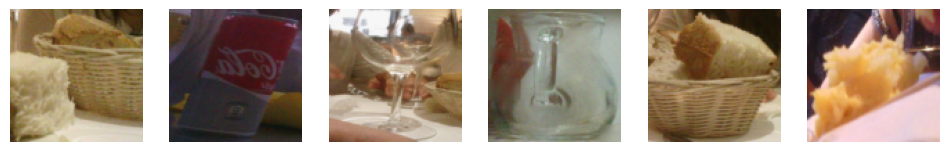

In [36]:
# visualize a sample image
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
inputs, targets = next(iter(train_dataloader))

# Convert the images to numpy arrays
images = inputs.numpy()

# Plot the images
fig, axes = plt.subplots(figsize=(12, 6), ncols=6)
for i in range(6):
    axes[i].imshow(np.transpose(images[i], (1, 2, 0)))
    axes[i].axis('off')
plt.show()



In [7]:
# import torch.nn as nn
# import torch.nn.functional as F

# def accuracy(outputs, labels):
#     _, preds = torch.max(outputs, dim=1)
#     return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# class ImageClassificationBase(nn.Module):
    
#     def training_step(self, batch):
#         images, labels = batch 
#         out = self(images)                  # Generate predictions
#         loss = F.cross_entropy(out, labels) # Calculate loss
#         return loss
    
#     def validation_step(self, batch):
#         images, labels = batch 
#         out = self(images)                    # Generate predictions
#         loss = F.cross_entropy(out, labels)   # Calculate loss
#         acc = accuracy(out, labels)           # Calculate accuracy
#         return {'val_loss': loss.detach(), 'val_acc': acc}
        
#     def validation_epoch_end(self, outputs):
#         batch_losses = [x['val_loss'] for x in outputs]
#         epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
#         batch_accs = [x['val_acc'] for x in outputs]
#         epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
#         return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
#     def epoch_end(self, epoch, result):
#         print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
#             epoch, result['train_loss'], result['val_loss'], result['val_acc']))

# class ClassificationModel(ImageClassificationBase):
#     def __init__(self):
#         super().__init__()
#         self.network = nn.Sequential(
            
#             nn.Conv2d(3, 32, kernel_size = 5, padding = 1),
#             nn.ReLU(),
#             nn.BatchNorm2d(32),
#             nn.Conv2d(32,64, kernel_size = 5, stride = 2, padding = 1),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2,2),
#             # nn.Dropout(0.25),
        
#             nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),
#             nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),
#             nn.MaxPool2d(2,2),
#             # nn.Dropout(0.25),
            
#             nn.Flatten(),
#             nn.Linear(57600,512),
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             nn.Linear(512,256),
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             nn.Linear(256,9)
#         )
    
#     def forward(self, xb):
#         return self.network(xb)


In [9]:
# @torch.no_grad()
# def evaluate(model, val_loader):
#     model.eval()
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)

# def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
#     history = []
#     optimizer = opt_func(model.parameters(),lr)
#     for epoch in range(epochs):
        
#         model.train()
#         train_losses = []
#         for batch in train_loader:
#             loss = model.training_step(batch)
#             train_losses.append(loss)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
            
#         result = evaluate(model, val_loader)
#         result['train_loss'] = torch.stack(train_losses).mean().item()
#         model.epoch_end(epoch, result)
#         history.append(result)
    
#     return history

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, drop_rate=0.0):
        super(DenseBlock, self).__init__()
        self.dropout = nn.Dropout(drop_rate)
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels, growth_rate, kernel_size=3, padding=1)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(growth_rate, growth_rate, kernel_size=3, padding=1)
        # Third convolutional layer
        # self.conv3 = nn.Conv2d(growth_rate, growth_rate, kernel_size=3, padding=1)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.dropout(out)
        out = F.relu(self.conv2(out))
        out = self.dropout(out)
        # out = F.relu(self.conv3(out))
        # out = self.dropout(out)
        out = torch.cat([x, out], 1)
        return out


class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(x)
        out = self.pool(out)
        return out

class DenseNet(nn.Module):
    def __init__(self, growth_rate=32, block_layers=[6, 12, 24, 16], num_classes=9):
        super(DenseNet, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module('conv0', nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3))
        self.features.add_module('norm0', nn.BatchNorm2d(64))
        self.features.add_module('relu0', nn.ReLU(inplace=True))
        self.features.add_module('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

        in_channels = 64
        for i, num_layers in enumerate(block_layers):
            block = self._make_dense_block(in_channels, growth_rate, num_layers)
            self.features.add_module(f'denseblock{i + 1}', block)
            in_channels += num_layers * growth_rate
            if i != len(block_layers) - 1:
                trans = self._make_transition_layer(in_channels, in_channels // 2)
                self.features.add_module(f'transition{i + 1}', trans)
                in_channels = in_channels // 2

        self.features.add_module('norm5', nn.BatchNorm2d(in_channels))
        self.features.add_module('relu5', nn.ReLU(inplace=True))
        self.features.add_module('pool5', nn.AdaptiveAvgPool2d((1, 1)))
        self.classifier = nn.Linear(in_channels, num_classes)

    def forward(self, x):
        features = self.features(x)
        out = torch.flatten(features, 1)
        out = self.classifier(out)
        return out

    def _make_dense_block(self, in_channels, growth_rate, num_layers):
        layers = []
        for i in range(num_layers):
            layers.append(DenseBlock(in_channels + i * growth_rate, growth_rate))
        return nn.Sequential(*layers)

    def _make_transition_layer(self, in_channels, out_channels):
        return TransitionLayer(in_channels, out_channels)

In [38]:
from tqdm import tqdm

def fit(model, train_loader, val_loader, loss_function, optimizer, scheduler, epochs):
    history = {'train_loss': [], 'val_loss': [], 'train_accuracy': [], 'val_accuracy': []}
    best_val_loss = float('inf')

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_losses = []
        train_correct = 0
        train_total = 0
        pbar = tqdm(train_loader, desc=f"Training epoch {epoch+1}")
        for i, (images, labels) in enumerate(pbar):
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            outputs = model(images)
            loss = loss_function(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            scheduler.step(epoch)


        # Validation phase
        model.eval()
        val_losses = []
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                if torch.cuda.is_available():
                    images = images.cuda()
                    labels = labels.cuda()

                outputs = model(images)
                loss = loss_function(outputs, labels)
                val_losses.append(loss.item())
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = np.mean(val_losses)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'models/best_model.pth')

        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)
        train_accuracy = 100 * train_correct / train_total
        val_accuracy = 100 * val_correct / val_total

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_accuracy'].append(train_accuracy)
        history['val_accuracy'].append(val_accuracy)


        current_lr = optimizer.param_groups[0]['lr']
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss}, Val Loss: {val_loss}, Train Accuracy: {train_accuracy}%, Val Accuracy: {val_accuracy}%, Learning Rate: {current_lr}%')

    return history

In [39]:
model = DenseNet()

In [40]:
class CustomLRScheduler:
    def __init__(self, optimizer, base_lr, max_lr, epochs):
        self.optimizer = optimizer
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.epochs = epochs

    def step(self, epoch):
        lr = self.base_lr + (self.max_lr - self.base_lr) * (epoch / self.epochs)
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr





In [41]:
if torch.cuda.is_available():
    model = model.cuda()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0008)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0008, weight_decay=1e-5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0008)
scheduler = CustomLRScheduler(optimizer, base_lr=0.0008, max_lr=0.0008, epochs=30)



# Train the model
history = fit(model, train_dataloader, val_dataloader, loss_function, optimizer,scheduler, epochs=30)








Training epoch 1: 100%|██████████| 149/149 [02:31<00:00,  1.02s/it]


Epoch [1/30], Train Loss: 1.2213770379156075, Val Loss: 1.3701687902212143, Train Accuracy: 57.62819160160372%, Val Accuracy: 52.976190476190474%, Learning Rate: 0.0008%


Training epoch 2: 100%|██████████| 149/149 [02:24<00:00,  1.03it/s]


Epoch [2/30], Train Loss: 0.7324548543699636, Val Loss: 1.4939847216010094, Train Accuracy: 74.10846170078075%, Val Accuracy: 56.15079365079365%, Learning Rate: 0.0008%


Training epoch 3: 100%|██████████| 149/149 [02:21<00:00,  1.05it/s]


Epoch [3/30], Train Loss: 0.5431912075353149, Val Loss: 0.7200251221656799, Train Accuracy: 81.08250685798691%, Val Accuracy: 76.38888888888889%, Learning Rate: 0.0008%


Training epoch 4: 100%|██████████| 149/149 [02:13<00:00,  1.11it/s]


Epoch [4/30], Train Loss: 0.38836904000115874, Val Loss: 1.445497252047062, Train Accuracy: 86.89596961384258%, Val Accuracy: 58.53174603174603%, Learning Rate: 0.0008%


Training epoch 5: 100%|██████████| 149/149 [02:33<00:00,  1.03s/it]


Epoch [5/30], Train Loss: 0.30299415734390284, Val Loss: 0.963612312451005, Train Accuracy: 89.68136737708377%, Val Accuracy: 71.62698412698413%, Learning Rate: 0.0008%


Training epoch 6: 100%|██████████| 149/149 [02:20<00:00,  1.06it/s]


Epoch [6/30], Train Loss: 0.22160991366277605, Val Loss: 0.7540783323347569, Train Accuracy: 92.75163536611099%, Val Accuracy: 75.39682539682539%, Learning Rate: 0.0008%


Training epoch 7: 100%|██████████| 149/149 [02:11<00:00,  1.13it/s]


Epoch [7/30], Train Loss: 0.21952055612166457, Val Loss: 0.6127874832600355, Train Accuracy: 92.4351128930154%, Val Accuracy: 82.14285714285714%, Learning Rate: 0.0008%


Training epoch 8:   9%|▊         | 13/149 [00:13<02:18,  1.02s/it]


KeyboardInterrupt: 

Training with learning rate: 0.001


Training epoch 1: 100%|██████████| 72/72 [00:30<00:00,  2.36it/s]


NameError: name 'np' is not defined

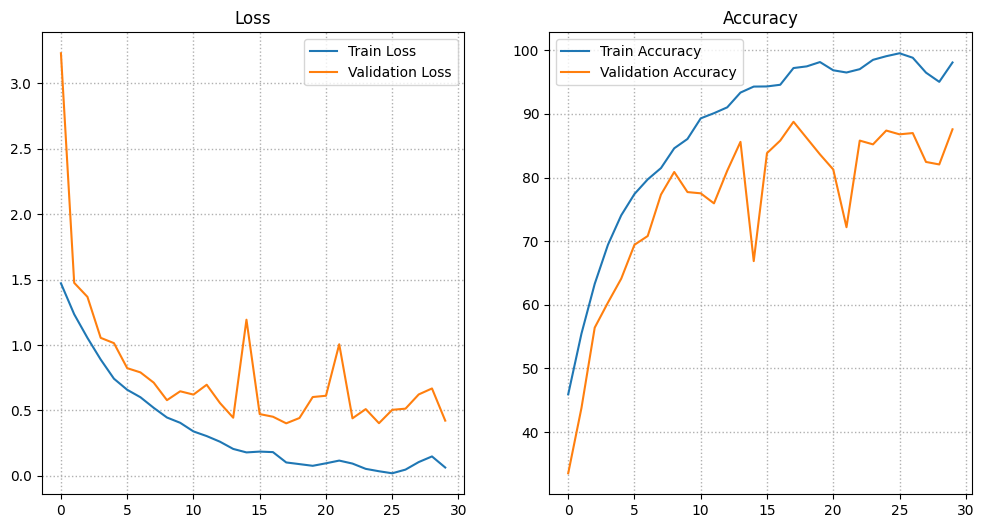

In [37]:
# Plot the training and validation loss and accuracy in another graph

import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()
    ax1.grid(which='both', linestyle=':', linewidth=1)

    ax2.plot(history['train_accuracy'], label='Train Accuracy')
    ax2.plot(history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    ax2.grid(which='both', linestyle=':', linewidth=1)

    plt.show()

plot_training_history(history)

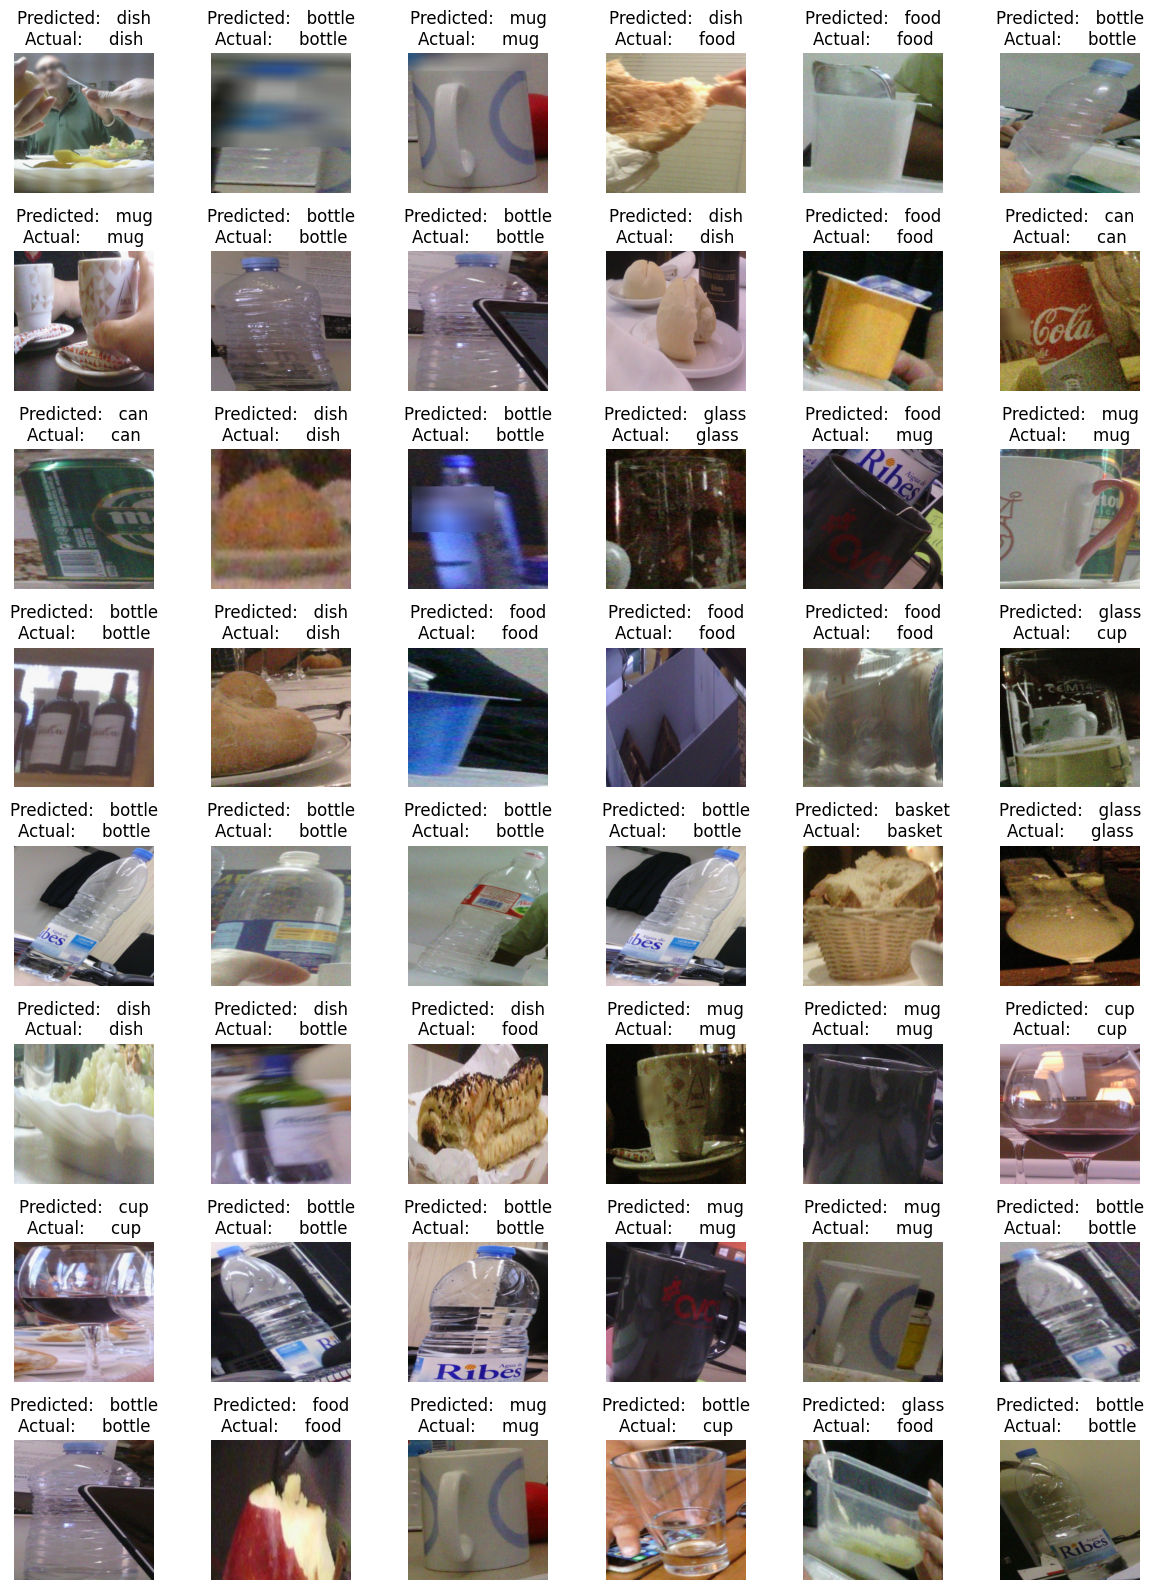

In [40]:
with open('category.txt', 'r') as f:
    next(f) 
    categories = f.readlines()
categories = [x.strip().split('\t')[1] for x in categories]


with open('category.txt', 'r') as f:
    next(f)  # Skip the header line
    categories = f.readlines()
categories = [x.strip().split('\t')[1] for x in categories]


def predict_image(img, modelf):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = modelf(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

# Load the best model 
best_model = DenseNet()
best_model.load_state_dict(torch.load('models/best_model.pth'))

# Get a batch of validation data
test_dataloader = DataLoader(val_dataset, batch_size=48, shuffle=True)

# Get a batch of validation data
inputs, labels = next(iter(test_dataloader))

# Make predictions
preds = best_model(inputs)

# Convert the images to numpy arrays
images = inputs.numpy()

# Calculate the number of rows and columns
n_images = len(images)
n_cols = 6
n_rows = n_images // n_cols + (n_images % n_cols > 0)

# Create a figure with the calculated number of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))

# Flatten the axes array in case it's multidimensional
axes = axes.flatten()

# Plot the images along with the predicted labels
for i in range(n_images):
    axes[i].imshow(np.transpose(images[i], (1, 2, 0)))
    axes[i].set_title(f'Predicted:   {categories[preds[i].argmax()]}\nActual:     {categories[labels[i]]}')
    axes[i].axis('off')

# Hide the remaining axes
for i in range(n_images, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
# model = ClassificationModel()
# model

In [ ]:
# def get_default_device():
#     """ Set Device to GPU or CPU"""
#     if torch.cuda.is_available():
#         return torch.device('cuda')
#     else:
#         return torch.device('cpu')
    

# def to_device(data, device):
#     "Move data to the device"
#     if isinstance(data,(list,tuple)):
#         return [to_device(x,device) for x in data]
#     return data.to(device,non_blocking = True)

# class DeviceDataLoader():
#     """ Wrap a dataloader to move data to a device """
    
#     def __init__(self, dl, device):
#         self.dl = dl
#         self.device = device
    
#     def __iter__(self):
#         """ Yield a batch of data after moving it to device"""
#         for b in self.dl:
#             yield to_device(b,self.device)
            
#     def __len__(self):
#         """ Number of batches """
#         return len(self.dl) 

In [ ]:
# device = get_default_device()
# device

In [ ]:
# train_dataloader = DeviceDataLoader(train_dataloader, device)
# val_dataloader = DeviceDataLoader(val_dataloader, device)
# to_device(model, device)

In [ ]:
# model = to_device(ClassificationModel(),device)

In [ ]:
# num_epochs = 10
# opt_func = torch.optim.Adam
# lr = 0.001
# #fitting the model on training data and record the result after each epoch
# history = fit(num_epochs, lr, model, train_dataloader, val_dataloader, opt_func)

In [ ]:
# # visualize output number
# Tmodel = nn.Sequential(
#     nn.Conv2d(3, 32, kernel_size = 5, padding = 1),
#     nn.ReLU(),
#     nn.Conv2d(32,64, kernel_size = 5, stride = 2, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),

#     nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),
    
#     nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),
    
#     nn.Flatten(),
# )

# # Pass a batch of input through the model up to the flatten layer
# x = torch.randn(1, 3, 256, 256)
# x = Tmodel[:](x)

# # Print the shape of the output
# print(x.shape)

In [ ]:
#just for visualizing output of each layer

class TDenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(TDenseBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, growth_rate, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(growth_rate, growth_rate, kernel_size=3, padding=1)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = torch.cat([x, out], 1)  # Concatenate input with output along channels
        return out

class TTransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TTransitionLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(x)
        out = self.pool(out)
        return out

class TDenseNet(nn.Module):
    def __init__(self, growth_rate=32, block_layers=[6, 12, 24, 16], num_classes=9):
        super(TDenseNet, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module('conv0', nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3))
        self.features.add_module('norm0', nn.BatchNorm2d(64))
        self.features.add_module('relu0', nn.ReLU(inplace=True))
        self.features.add_module('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

        in_channels = 64
        for i, num_layers in enumerate(block_layers):
            block = self._make_dense_block(in_channels, growth_rate, num_layers)
            self.features.add_module(f'denseblock{i + 1}', block)
            in_channels += num_layers * growth_rate
            if i != len(block_layers) - 1:
                trans = self._make_transition_layer(in_channels, in_channels // 2)
                self.features.add_module(f'transition{i + 1}', trans)
                in_channels = in_channels // 2

        self.features.add_module('norm5', nn.BatchNorm2d(in_channels))
        self.features.add_module('relu5', nn.ReLU(inplace=True))
        self.features.add_module('pool5', nn.AdaptiveAvgPool2d((1, 1)))
        self.classifier = nn.Linear(in_channels, num_classes)

    def forward(self, x):
        for name, module in self.features.named_children():
            x = module(x)
            print(f'{name}: {x.shape}')
        out = torch.flatten(x, 1)
        out = self.classifier(out)
        return out

    def _make_dense_block(self, in_channels, growth_rate, num_layers):
        layers = []
        for i in range(num_layers):
            layers.append(TDenseBlock(in_channels + i * growth_rate, growth_rate))
        return nn.Sequential(*layers)

    def _make_transition_layer(self, in_channels, out_channels):
        return TTransitionLayer(in_channels, out_channels)

In [ ]:
Tmodel = TDenseNet()
input = torch.randn(1, 3, 512, 512)
output = Tmodel(input)

conv0: torch.Size([1, 64, 256, 256])
norm0: torch.Size([1, 64, 256, 256])
relu0: torch.Size([1, 64, 256, 256])
pool0: torch.Size([1, 64, 128, 128])
denseblock1: torch.Size([1, 256, 128, 128])
transition1: torch.Size([1, 128, 64, 64])
denseblock2: torch.Size([1, 512, 64, 64])
transition2: torch.Size([1, 256, 32, 32])
denseblock3: torch.Size([1, 1024, 32, 32])
transition3: torch.Size([1, 512, 16, 16])
denseblock4: torch.Size([1, 1024, 16, 16])
norm5: torch.Size([1, 1024, 16, 16])
relu5: torch.Size([1, 1024, 16, 16])
pool5: torch.Size([1, 1024, 1, 1])
